# *Import Libraries*

In [3]:
#importing all necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.optimize import curve_fit
from numpy.polynomial import polynomial as poly
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')


# *Loading Dataset*

In [4]:
my_data=pd.read_csv('iris.csv')
my_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
my_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
#Summary of  datasets
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB



### *Insights*:
+ Species is categorical variable and rest all are numerical 


In [7]:
my_data.describe().T.round(2)


,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.05,0.43,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.76,1.76,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5


### *Insights*:
+ The lenght and width of petal depicts greater variability than Sepal measuring features,the small difference between mean and 50% value indicates relatively symmetric distributions which means data has no essential skewness. 

In [8]:
my_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
my_data=my_data.dropna() 

In [10]:
my_data.shape

(150, 5)

# *Statistical Analysis*

In [11]:
# finding skewness and kurt
stats_df = my_data.describe().loc[['std', 'mean']]
kurt = my_data.kurtosis(numeric_only= True)
skewness = my_data.skew(numeric_only= True)
stats_df.loc['kurtosis'] = kurt
stats_df.loc['skewness'] = skewness
stats_df = stats_df.T
stats_df.columns = {'Mean':'mean', 'Standard Deviation' : 'Std', 'Skewness' : 'skewness', 'Kurtosis': 'kurtosis'}
stats_df



,Mean,Standard Deviation,Skewness,Kurtosis
sepal_length,0.828066,5.843333,-0.552064,0.314911
sepal_width,0.433594,3.054000,0.290781,0.334053
petal_length,1.764420,3.758667,-1.401921,-0.274464
petal_width,0.763161,1.198667,-1.339754,-0.104997


# *Graphical Analysis*

In [12]:
def heatmap():

    '''
    create correlation matrix heatmap to determine the correlation between all numerical features
    
    '''
    corr = my_data.corr(method = 'pearson', numeric_only=True) 
    
    #Customizing the Heat Map 
    plt.figure(figsize=(8,5))#Adjust the figure size
    sns.heatmap(corr, fmt='.2f', annot = True,annot_kws={'size':12},cmap='Spectral', linecolor='black', linewidths=0.4,cbar_kws={'shrink':1})
    
    #add tittle and labels
    plt.xticks(fontsize=10,weight='light',fontstyle='italic')
    plt.yticks(fontsize=10,weight='light',fontstyle='italic',rotation=45)
    plt.title('Heat Map',fontsize=17,color='black',fontstyle='italic')
    plt.show()

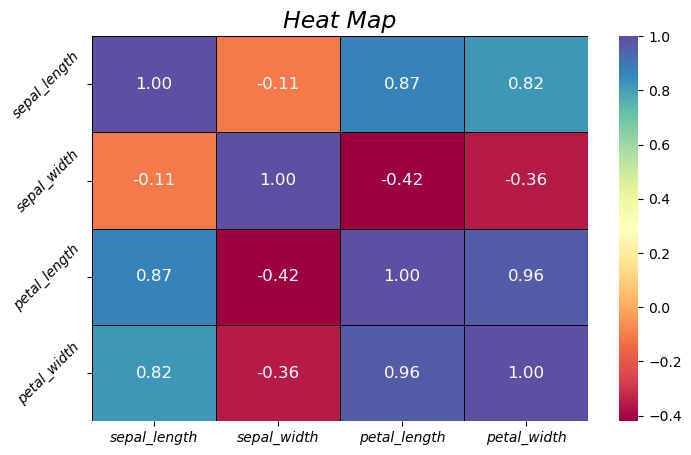

In [13]:
heatmap()

### *Insights*
+ From above heatmap , sepal width and sepal length has negative correlation  and petal width and sepal length has positive correlation which means they are linearly related so, we can remove one of them to enhance the performance of the model

# *Categorical Graph*

In [14]:
def boxplot(y,y_label):
    '''
    Box plot for the distribution of features across species 
    '''
    plt.figure(figsize=(8,5))
    sns.boxplot(my_data,x='species',y=y,palette=['teal','red','blue'])
    plt.title('Comparison of features',fontsize=13,fontstyle='italic',weight='bold')
    plt.xlabel('species',fontsize=12,fontstyle='italic',weight='bold')
    plt.ylabel(y_label,fontsize=12,fontstyle='italic',weight='bold')
    plt.show()

In [15]:
my_data.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

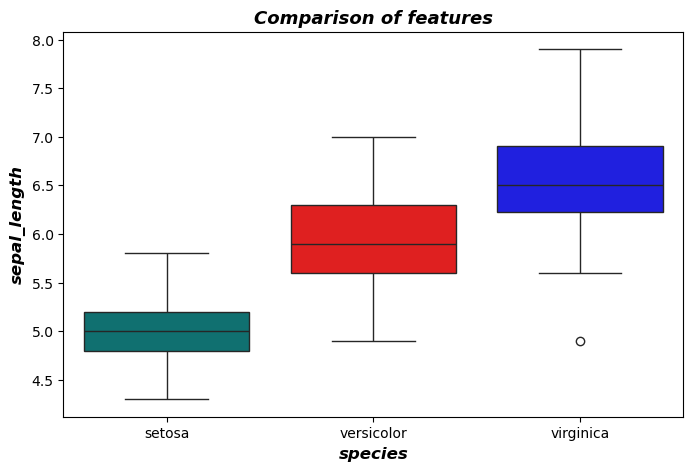

<Figure size 640x480 with 0 Axes>

In [16]:
boxplot(my_data['sepal_length'],'sepal_length')
plt.savefig('comparison of features.jpg')

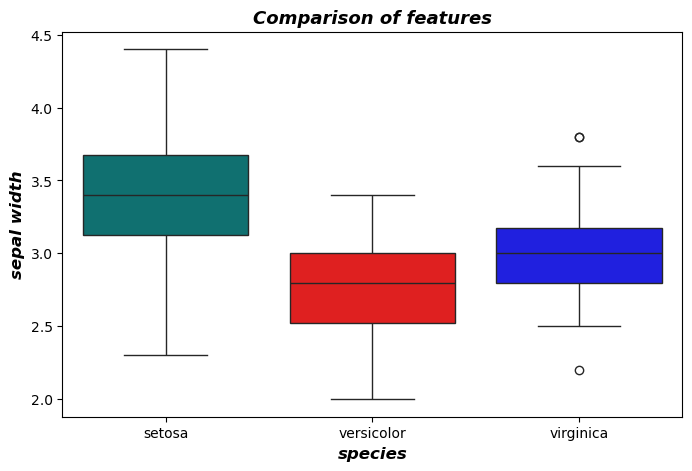

In [17]:
boxplot(my_data['sepal_width'],'sepal width')

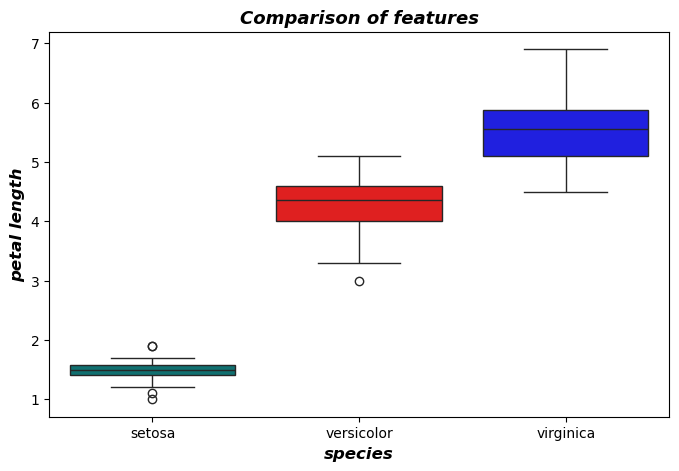

In [18]:
boxplot(my_data['petal_length'],'petal length')

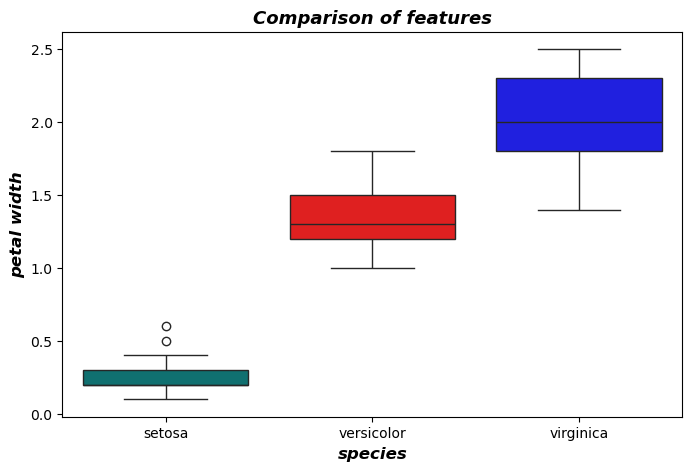

In [19]:
boxplot(my_data['petal_width'],'petal width')

### *Insights*
+ From above boxplots it shows that, virginica species has larger measurements as compared to setosa and versicolor, few overlaps exists in species but overall species data are well distinguished.

# *Relational Graphs*

In [20]:
def pairplot():
    
    '''create pairplot to see relationship between numerical variables for quick overview of dataset'''
    
    # Pair plot
    sns.pairplot(my_data, hue='species',hue_order=None, palette='Dark2',diag_kind='kde',markers=['o','s','D'])
    plt.show()

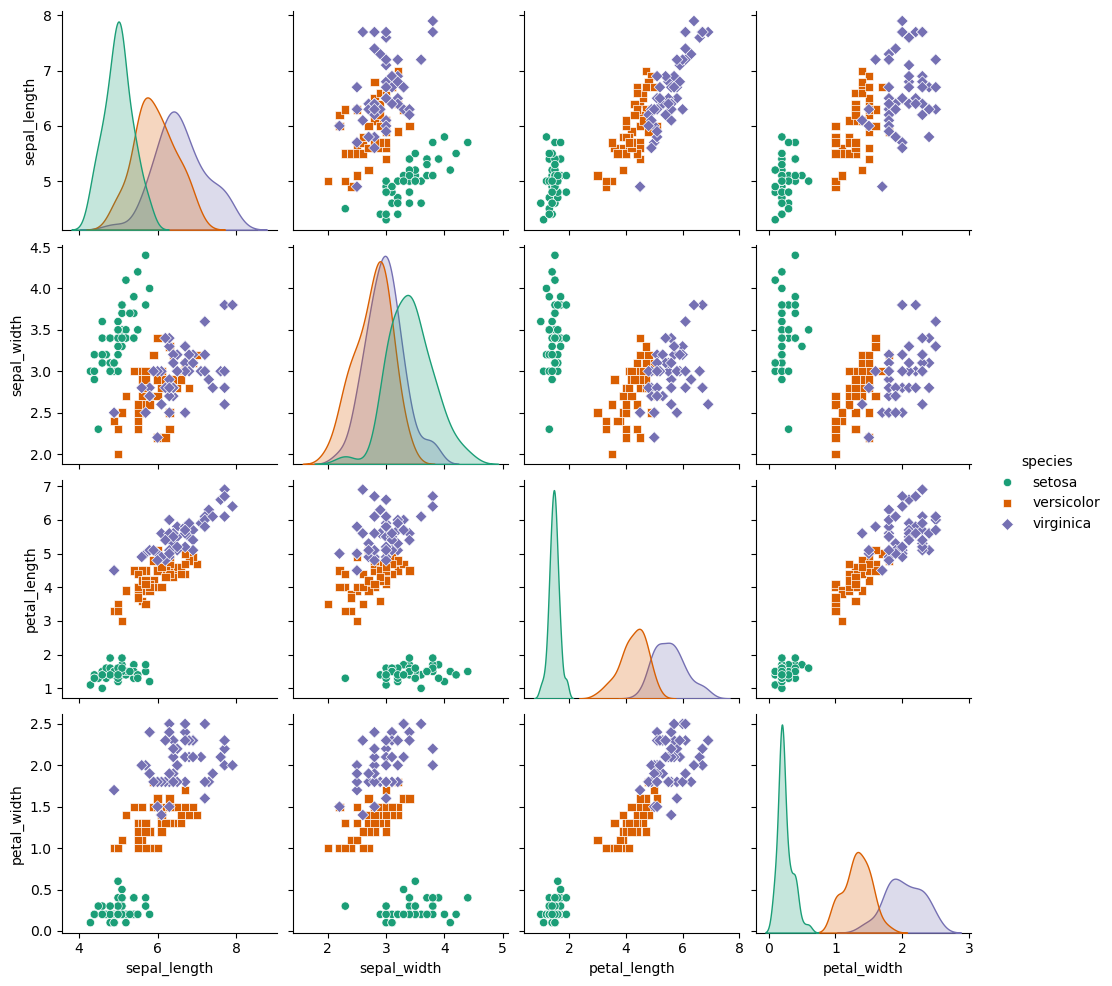

In [21]:
pairplot()

### *Insight*
+ Above pairplot provides better understanding for choosing classification models


### *Scatter Plot*

In [22]:
def plot_random_scatter_with_line(x, y,xline, yline,x_label,y_label):
    """
    Creates a scatter plot of random x and y data with overplotted line
    """
    plt.figure(dpi=144)

    # scatter plot
    plt.plot(x, y, 'bo')
    plt.plot(xline, yline, 'k-')

    # formatting
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'Scatter plot of {x_label} & {y_label} with overplotted line',fontsize=10)
    plt.show()
    return

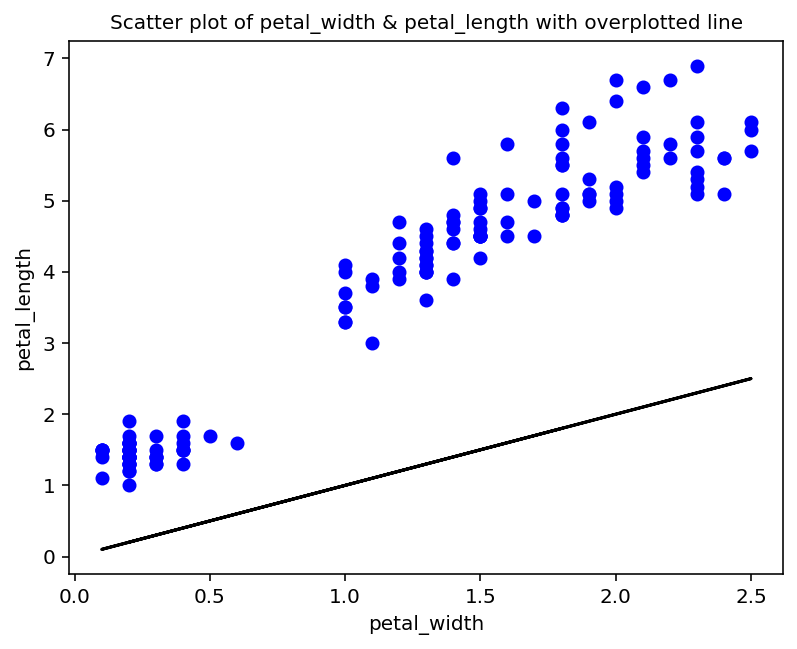

In [23]:
plot_random_scatter_with_line(my_data['petal_width'],my_data['petal_length'], my_data['petal_width'],my_data['petal_width'],'petal_width','petal_length')


# *Sepal Length and Width (Curve Fitting)*

Polynomial Coefficients: [ 6.30019539 -1.05179644  0.08326623]


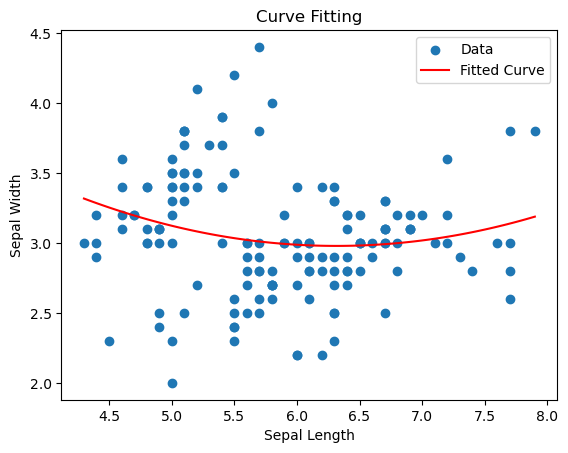

In [24]:
from numpy.polynomial.polynomial import Polynomial

# Extract features for fitting
x = my_data['sepal_length'].values
y = my_data['sepal_width'].values

# Fit a second-degree polynomial
coefficients = Polynomial.fit(x, y, deg=2).convert().coef
print("Polynomial Coefficients:", coefficients)

# Generate predictions
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = coefficients[0] + coefficients[1] * x_fit + coefficients[2] * x_fit**2

# Plot the fitted curve
plt.scatter(x, y, label='Data')
plt.plot(x_fit, y_fit, color='red', label='Fitted Curve')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Curve Fitting')
plt.legend()
plt.show()

In [25]:
# Petal Length and Width (Curve Fitting)

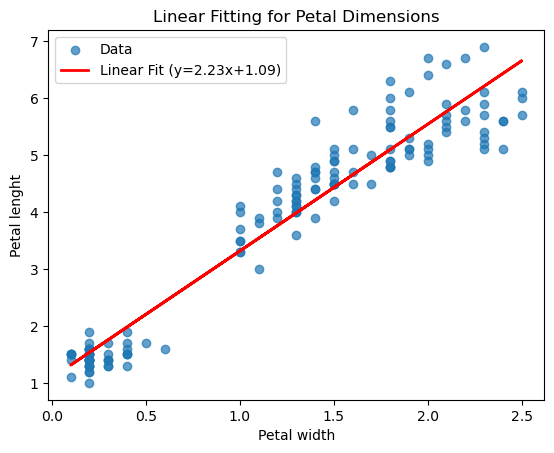

R-squared: 0.9269
P-value: 5.7767e-86


In [26]:
# Extract features for fitting
x = my_data['petal_width'].values
y = my_data['petal_length'].values

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Generate predictions for the fitted line
y_fit = slope * x + intercept

# Plot the original data and the fitted line
plt.scatter(x, y, label='Data', alpha=0.7)
plt.plot(x, y_fit, color='red', label=f'Linear Fit (y={slope:.2f}x+{intercept:.2f})', linewidth=2)
plt.xlabel('Petal width')
plt.ylabel('Petal lenght')
plt.title('Linear Fitting for Petal Dimensions')
plt.legend()
plt.show()

# Display regression metrics
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4e}")


In [28]:
# Suppose, 

a = 6.30019539
b = -1.05179644
sepal_length =0.08326623

sepal_width = linfunc(sepal_length,a, b)
print(f'sepal_width for {sepal_length} : {sepal_width:.2f}')

NameError: name 'linfunc' is not defined

## *Clustering*

In [31]:
my_data.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [32]:
xy = my_data[['petal_length','sepal_width']]

In [33]:
# creating a custom colormap for plotting
from matplotlib.colors import ListedColormap
colours = plt.cm.Set1(np.linspace(0, 1, 3))
cmap = ListedColormap(colours)

In [34]:
def one_silhoutte(n, xy):
    """
    Calculates the silhoutte score for n clusters
    """
    # set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=n, n_init=20)
    # Fit the data
    kmeans.fit(xy)
    labels = kmeans.labels_

    # calculate the silhoutte score
    score = silhouette_score(xy, labels)

    return score

In [35]:
# set up the clusterer with the number of expected clusters
kmeans = KMeans(n_clusters=3, n_init=20)  # Assuming 3 clusters, adjust if needed
# Fit the data
kmeans.fit(xy)
labels = kmeans.labels_
silhouette_score(xy, labels)

0.5930654335803219

In [36]:
# can automate the looking at cluster numbers (beware computational time)
best_n, best_score = None, -np.inf
for n in range(2, 11):  # 2 to 10 clusters
    score = one_silhoutte(n, xy)
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n:2g} clusters silhoutte score = {score:0.2f}")

print(f"Best number of clusters = {best_n:2g}")

 2 clusters silhoutte score = 0.74
 3 clusters silhoutte score = 0.59
 4 clusters silhoutte score = 0.56
 5 clusters silhoutte score = 0.44
 6 clusters silhoutte score = 0.38
 7 clusters silhoutte score = 0.39
 8 clusters silhoutte score = 0.39
 9 clusters silhoutte score = 0.41
10 clusters silhoutte score = 0.39
Best number of clusters =  2


In [42]:
def plot_elbow_method(min_k, max_k, wcss, best_n):
    """
    Plots the elbow method between min_k and max_k
    """
    fig, ax = plt.subplots(dpi=144)
    ax.plot(range(min_k, max_k + 1), wcss, 'kx-')
    ax.scatter(best_n, wcss[best_n-min_k], marker='o', color='red', facecolors='none', s=50)
    ax.set_xlabel('Number of cluster')
    ax.set_xlim(min_k, max_k)
    ax.set_ylabel('WCSS')
    ax.set_title('Elbow Method')
    plt.show()
    return

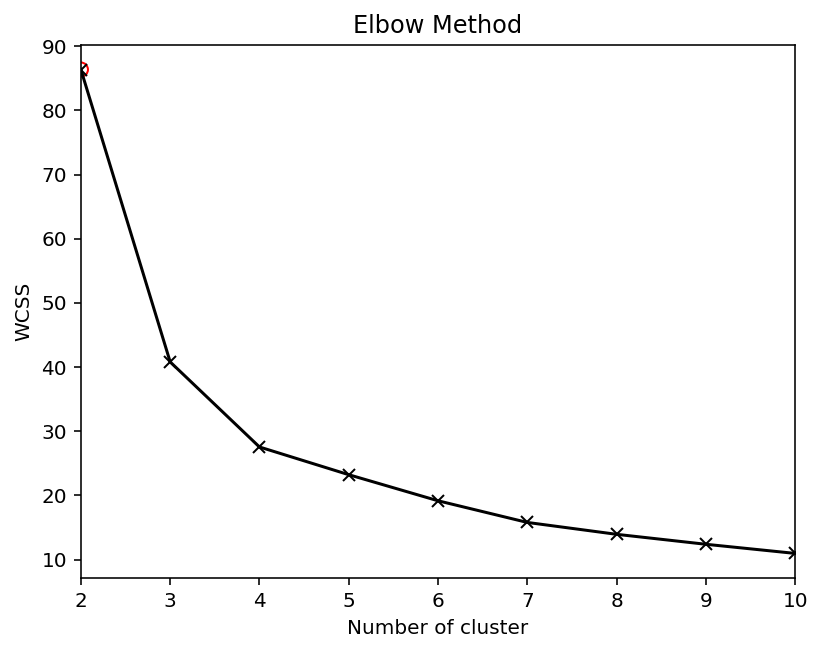

In [41]:
wcss = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, n_init=20)
    kmeans.fit(xy)
    wcss.append(kmeans.inertia_)

plot_elbow_method(2, 10, wcss, best_n)

 *Above elbow figure represent 2 is correct number of clusters*

In [175]:
ncluster = 3 #Guess
# set up the clusterer with the number of expected clusters (by eye)
# kmeans starts with a random seed and repeats the clustering n_init times.
kmeans = KMeans(n_clusters=ncluster, n_init=20)

# Fit the data, results are stored in the kmeans object
kmeans.fit(xy)     # fit done on x,y pairs

labels = kmeans.labels_  # the group for each fitted point

# the estimated cluster centres
cen = kmeans.cluster_centers_
xkmeans = cen[:, 0]
ykmeans = cen[:, 1]

In [178]:
def plot_fitted_clusters(x,y,x_label,y_label):
    """
    Plots clustered data as a scatter plot with determined centres shown
    """
    fig, ax = plt.subplots(dpi=144)
    s = ax.scatter(x, y, c=labels, cmap=cmap, marker='o', label='Data')


    ax.plot(xkmeans, ykmeans, 'bs', ms=10, label='Estimated Centres')

    cbar = fig.colorbar(s, ax=ax)
    ax.legend()
    ax.set_xlabel('petal length')
    ax.set_ylabel('sepal width')
    ax.set_title(f'clustering based on{x_label},{y_label}',fontsize=9,fontstyle='italic')
    plt.show()
    return

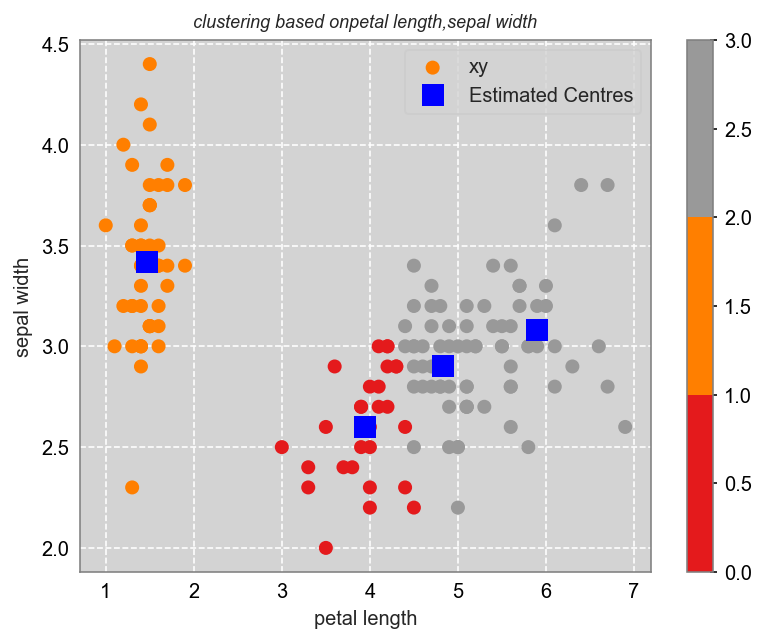

In [179]:
plot_fitted_clusters(my_data['petal_length'],my_data['sepal_width'],'petal length','sepal width')

In [188]:
## *Prediction of clusters
petal_length=5
sepal_width=3.4

Cluster_label = kmeans.predict([[petal_length,sepal_width]])[0]
print(f'Cluster_label is {Cluster_label} if petal_length is{petal_length},sepal_width is {sepal_width}') 


Cluster_label is 3 if petal_length is5,sepal_width is 3.4
